In [2]:
%load_ext autoreload

%autoreload 2
%matplotlib inline

import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import numpy as np
import pytz
import pandas as pd

from analysis import get_ticker_history, get_etfs_history, History

MOSCOW_TIMEZONE = pytz.timezone('Europe/Moscow')

# From rest
# client = openapi.sandbox_api_client(token)
# client.sandbox.sandbox_register_post()
# client.sandbox.sandbox_clear_post()
# client.sandbox.sandbox_currencies_balance_post(sandbox_set_currency_balance_request={"currency": "USD", "balance": 1000})


# From streaming
# candle_subs = [{'figi': 'BBG000B9XRY4', 'interval': '1min'}, {'figi': 'BBG009S39JX6', 'interval': '1min'}]
# orderbook_subs = [{'figi': 'BBG0013HGFT4', 'depth': 1}, {'figi': 'BBG009S39JX6', 'depth': 3}]
# instrument_info_subs = [{'figi': 'BBG000B9XRY4'}, {'figi': 'BBG009S39JX6'}]

# run_stream_consumer(token,
#                     candle_subs, orderbook_subs, instrument_info_subs,
#                     on_candle_event=print_event,
#                     on_orderbook_event=print_event,
#                     on_instrument_info_event=print_event)



In [3]:
end = dt.datetime.now(dt.timezone.utc)
start = end - dt.timedelta(weeks=52)
interval = 'day'
ticker='FXGD'

# print(etfs)


# print(market.market_candles_get(figi=figi, _from=start.isoformat(), to=end.isoformat(), interval=interval))
# ['payload']['instruments'][0]['figi']

ticker_history = get_ticker_history(ticker=ticker, start=start, end=end, interval=interval)

Text(0.5, 1.0, 'FXGD')

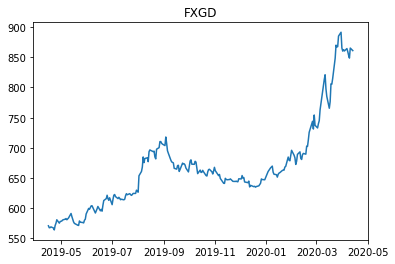

In [4]:
plt.figure()
plt.plot(ticker_history['time'].values, ticker_history['c'])
plt.title(ticker)

In [5]:
etfs_history, etf_tickers = get_etfs_history()

## Try to correctly download and store history

In [30]:
hist_daily = History(interval='day')
# display(hist_daily.data.time.dtype)
hist_daily.update(reload=0)
hist_daily.data

Getting forecast with interval=day:   0%|          | 0/8 [00:00<?, ?it/s]

Local history data loaded successfully


Getting forecast with interval=day:  12%|█▎        | 1/8 [00:02<00:18,  2.63s/it]

Server returned an empty reply for the following period: [datetime.datetime(2013, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Europe/Moscow' LMT+2:30:00 STD>), datetime.datetime(2013, 4, 22, 16, 51, 6, 887412, tzinfo=datetime.timezone(datetime.timedelta(seconds=7200), 'CEST'))]!


Getting forecast with interval=day: 100%|██████████| 8/8 [00:29<00:00,  3.68s/it]


,figi,o,c,h,l,v,time,ticker
302,BBG004HNZFH2,1050.0,1060.0,1060.8001,1050.0,361,2013-04-30 07:00:00+00:00,FXRB
303,BBG004HNZFH2,1017.0,1019.0,1025.0000,1017.0,19,2013-05-03 07:00:00+00:00,FXRB
304,BBG004HNZFH2,1015.5,951.1,1015.5000,917.1,223,2013-05-06 07:00:00+00:00,FXRB
305,BBG004HNZFH2,990.0,1034.6,1045.0000,990.0,215,2013-05-07 07:00:00+00:00,FXRB
306,BBG004HNZFH2,1065.0,1065.0,1065.0000,1065.0,1,2013-05-08 07:00:00+00:00,FXRB
...,...,...,...,...,...,...,...,...
18533,BBG00MF4JRQ8,1130.4,1127.1,1134.2000,1125.1,2582,2020-04-13 07:00:00+00:00,VTBB
17533,BBG005HLSZ23,3735.0,3620.0,3735.0000,3598.0,8829,2020-04-13 07:00:00+00:00,FXUS
18283,BBG004HNZFH2,1678.0,1664.0,1683.0000,1653.0,4815,2020-04-13 07:00:00+00:00,FXRB
17783,BBG0073DLHS1,2748.0,2677.0,2748.0000,2629.5,6684,2020-04-13 07:00:00+00:00,FXRL


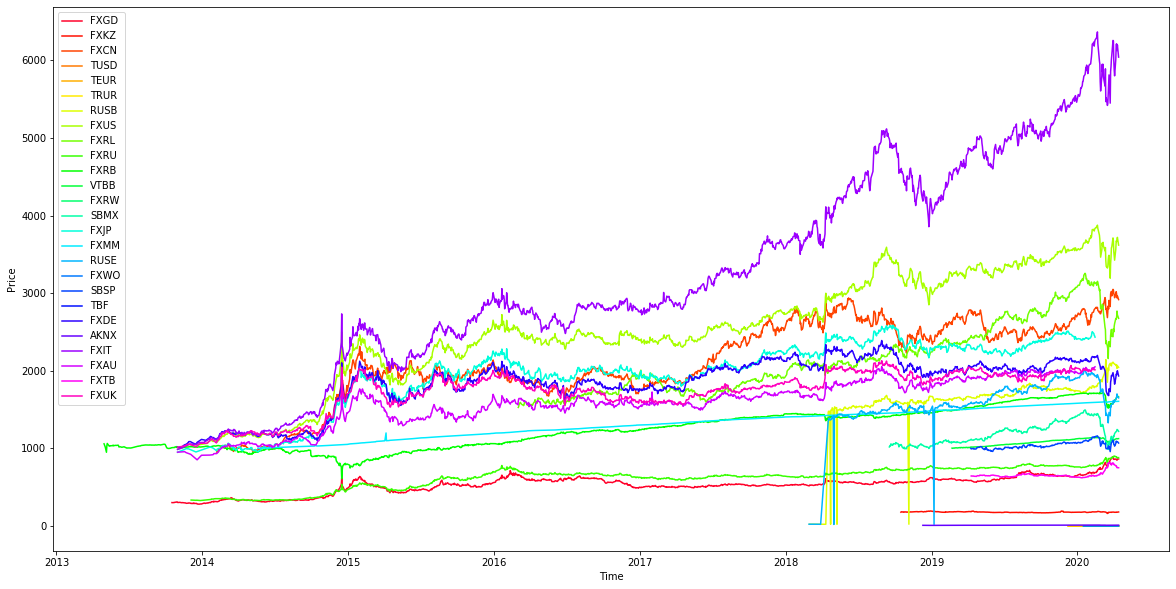

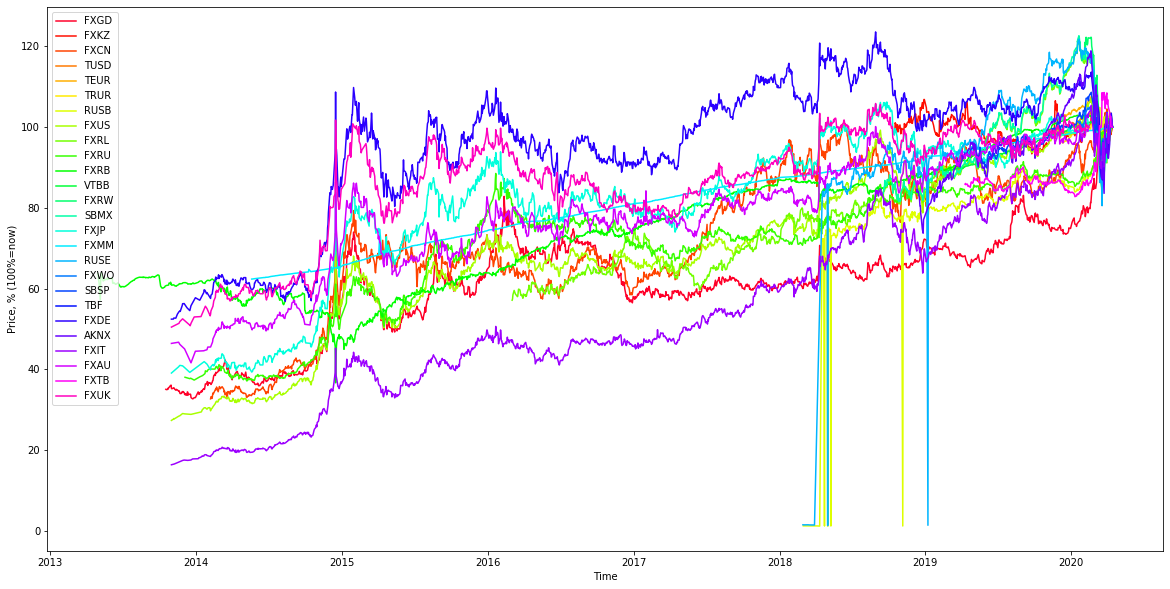

In [31]:
data = hist_daily.data
tickers = hist_daily.tickers
# print(data['time'].dtype)

M = len(hist_daily.tickers)
cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=M-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

def get_last_not_nan(lst):
    for el in lst[::-1]:
        if not np.isnan(el):
            return el
        
    return np.nan


plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(M)])
for ticker in tickers:
    filter = (data.ticker == ticker)
    t = data.loc[filter, 'time'].values
    y = data.loc[filter, 'c'].values # / get_last_not_nan(data[ticker+'_c']) * 100
#     print(ticker, y)
    plt.plot(t, y, label=ticker)
    
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend()

plt.figure(figsize = (20,10))
ax = plt.gca()
ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(M)])
for ticker in tickers:
    filter = data.ticker == ticker
    t = data.loc[filter, 'time'].values
    y = data.loc[filter, 'c'] / get_last_not_nan(data.loc[filter, 'c']) * 100
    plt.plot(t, y, label=ticker)
    
plt.ylabel('Price, % (100%=now)')
plt.xlabel('Time')
plt.legend()

## Basic statistics

In [32]:
hist_daily.statistics()

,figi,o,c,h,l,v,time,ticker
302,BBG004HNZFH2,1050.0,1060.0,1060.8001,1050.0,361,2013-04-30 07:00:00+00:00,FXRB
303,BBG004HNZFH2,1017.0,1019.0,1025.0000,1017.0,19,2013-05-03 07:00:00+00:00,FXRB
304,BBG004HNZFH2,1015.5,951.1,1015.5000,917.1,223,2013-05-06 07:00:00+00:00,FXRB
305,BBG004HNZFH2,990.0,1034.6,1045.0000,990.0,215,2013-05-07 07:00:00+00:00,FXRB
306,BBG004HNZFH2,1065.0,1065.0,1065.0000,1065.0,1,2013-05-08 07:00:00+00:00,FXRB
...,...,...,...,...,...,...,...,...
18533,BBG00MF4JRQ8,1130.4,1127.1,1134.2000,1125.1,2582,2020-04-13 07:00:00+00:00,VTBB
17533,BBG005HLSZ23,3735.0,3620.0,3735.0000,3598.0,8829,2020-04-13 07:00:00+00:00,FXUS
18283,BBG004HNZFH2,1678.0,1664.0,1683.0000,1653.0,4815,2020-04-13 07:00:00+00:00,FXRB
17783,BBG0073DLHS1,2748.0,2677.0,2748.0000,2629.5,6684,2020-04-13 07:00:00+00:00,FXRL


                      o          c          h          l          v  \
figi                                                                  
BBG000000000     0.0997     0.1001     0.1002     0.0993   12022211   
BBG000000001     5.2800     5.2950     5.3050     5.2700    9204206   
BBG000000002     0.1043     0.1043     0.1047     0.1041    4015697   
BBG004HNZFH2  1737.0000  1724.0000  1774.0000  1719.0000      44380   
BBG005DXDPK9   894.8000   891.4000   904.6000   885.0000     632797   
BBG005H7MXN2  2214.5000  2199.0000  2214.5000  2176.0000      23295   
BBG005HLK5V5  2068.0000  2069.0000  2100.0000  2045.0000      17485   
BBG005HLSZ23  3882.0000  3877.0000  3900.0000  3855.0000      30446   
BBG005HLTYH9  6340.0000  6367.0000  6950.0000  6287.0000      54545   
BBG005HM5979  2509.0000  2510.0000  2533.0000  2502.0000       7159   
BBG005HM6BL7  2048.0000  2052.0000  2200.0000  2027.0000       6951   
BBG005N1KZX4   901.1000   900.9000   916.0000   891.0000     149230   
BBG005

,figi,o,c,h,l,v,time,ticker
0,BBG005DXDPK9,296.00,302.87,302.87,295.5,3200,2013-10-17 07:00:00+00:00,FXGD
1,BBG005DXDPK9,302.50,302.19,302.58,301.9,5060,2013-10-18 07:00:00+00:00,FXGD
2,BBG005DXDPK9,301.81,302.49,302.75,301.6,70,2013-10-21 07:00:00+00:00,FXGD
3,BBG005DXDPK9,302.35,304.90,305.00,301.0,3600,2013-10-22 07:00:00+00:00,FXGD
4,BBG005DXDPK9,304.37,303.76,304.37,303.7,400,2013-10-23 07:00:00+00:00,FXGD
...,...,...,...,...,...,...,...,...
1639,BBG005DXDPK9,862.00,859.40,868.80,852.0,210438,2020-04-07 07:00:00+00:00,FXGD
1640,BBG005DXDPK9,860.00,853.40,861.60,852.0,47283,2020-04-08 07:00:00+00:00,FXGD
1641,BBG005DXDPK9,852.60,848.60,854.00,832.0,190900,2020-04-09 07:00:00+00:00,FXGD
1642,BBG005DXDPK9,852.80,865.20,868.00,849.4,93976,2020-04-10 07:00:00+00:00,FXGD
